In [1]:
import pandas as pd
import numpy as np
import torch
import time
from datetime import datetime
import os
import matplotlib.pyplot as plt
import torch.nn.functional as F
import seaborn as sns
from scipy.stats import norm

In [2]:
pickle_file = 'pretrained_models/PreActResnet18/unlabloss_14.pickle'
from utils import *

In [3]:
example_cross_ent_losses, example_multi_margin_losses, pretrained_acc, pretrained_epochs, example_outputs \
    = load_pretrained_example_losses_from_file('pretrained_models', 'PreActResnet18', 14)

Loaded losses for 500000 == 500000 train examples from file pretrained_models/PreActResnet18/unlabloss_14.pickle


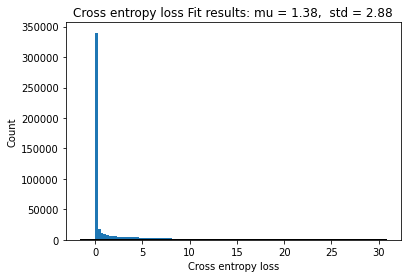

In [4]:
mu, std = norm.fit(example_cross_ent_losses)
plt.figure()
plt.hist(example_cross_ent_losses, bins = 100, histtype = 'bar')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Cross entropy loss Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel("Cross entropy loss")
plt.ylabel('Count')
# plt.title('Histogram of cross entropy loss for unlabeled data')
plt.show()

In [5]:
soft_out = F.softmax(example_outputs)

/afs/cs.wisc.edu/u/v/g/vgoelsj/pythonprojects/sec_proj/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  """Entry point for launching an IPython kernel.


In [6]:
print(soft_out.shape)

torch.Size([500000, 10])


In [7]:
print(torch.max(soft_out))
soft_max = torch.max(soft_out, dim=1).values
print(soft_max.shape)

tensor(1.)
torch.Size([500000])


In [8]:
soft_max[0:8]

tensor([0.9936, 0.9882, 0.9987, 0.9932, 1.0000, 0.8189, 0.7366, 0.8318])

In [9]:
soft_out[0:8]

tensor([[9.9363e-01, 6.2753e-03, 7.6077e-08, 1.1577e-06, 8.3061e-07, 3.8725e-08,
         1.0268e-09, 4.0069e-06, 1.3074e-06, 9.0153e-05],
        [9.8819e-01, 1.0197e-07, 1.2603e-03, 1.0409e-02, 1.4855e-06, 2.4171e-05,
         1.7817e-07, 1.7026e-05, 3.5067e-05, 5.7701e-05],
        [1.2309e-03, 1.8655e-09, 1.4868e-05, 9.9872e-01, 2.9808e-05, 4.9975e-06,
         9.5566e-08, 2.0562e-06, 2.1561e-07, 2.6194e-07],
        [9.9321e-01, 9.6248e-10, 6.7553e-03, 1.1585e-08, 1.9707e-05, 9.5298e-10,
         8.4927e-10, 6.5291e-10, 1.6306e-05, 3.3301e-09],
        [9.9999e-01, 2.3631e-08, 3.2470e-07, 5.3473e-11, 3.4562e-07, 1.5439e-10,
         7.7934e-13, 7.8045e-09, 4.6770e-06, 1.3714e-07],
        [8.1886e-01, 1.6102e-03, 5.2990e-04, 5.0606e-04, 6.3817e-04, 5.9836e-05,
         9.0869e-05, 2.9310e-04, 1.7672e-01, 6.8608e-04],
        [2.1317e-01, 1.0188e-06, 3.1752e-04, 4.8899e-02, 7.3656e-01, 2.1982e-04,
         4.9204e-08, 8.0981e-04, 1.6255e-05, 6.2974e-06],
        [6.5448e-03, 8.6389

In [10]:
example_outputs[0:8]

tensor([[  6.5708,   1.5061,  -9.8143,  -7.0918,  -7.4239, -10.4896, -14.1196,
          -5.8503,  -6.9703,  -2.7368],
        [  4.3051, -11.7816,  -2.3594,  -0.2480,  -9.1028,  -6.3134, -11.2235,
          -6.6637,  -5.9412,  -5.4432],
        [ -0.0361, -13.4359,  -4.4524,   6.6626,  -3.7569,  -5.5427,  -9.4996,
          -6.4308,  -8.6859,  -8.4913],
        [  9.3739, -11.3808,   4.3833,  -8.8929,  -1.4538, -11.3907, -11.5059,
         -11.7689,  -1.6432, -10.1395],
        [ 10.8966,  -6.6642,  -4.0438, -12.7553,  -3.9814, -11.6950, -16.9838,
          -7.7720,  -1.3763,  -4.9057],
        [  2.2271,  -4.0045,  -5.1159,  -5.1620,  -4.9300,  -7.2970,  -6.8792,
          -5.7081,   0.6937,  -4.8576],
        [  1.0823, -11.1688,  -5.4270,  -0.3900,   2.3222,  -5.7947, -14.1993,
          -4.4907,  -8.3991,  -9.3474],
        [ -2.1517, -11.0844,  -3.8677,   2.6932,  -0.8241,  -6.2282, -10.1063,
           0.8798, -10.0930,  -8.3456]])

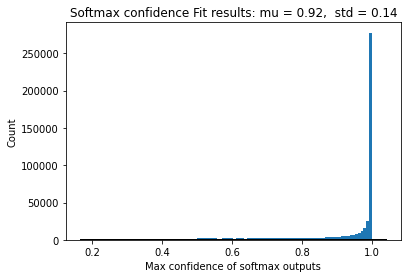

In [11]:
mu, std = norm.fit(soft_max)
plt.figure()
plt.hist(soft_max, bins = 100, histtype = 'bar')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = "Softmax confidence Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)
plt.xlabel("Max confidence of softmax outputs")
plt.ylabel('Count')
# plt.title('Histogram of cross entropy loss for unlabeled data')
plt.show()


/afs/cs.wisc.edu/u/v/g/vgoelsj/pythonprojects/sec_proj/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


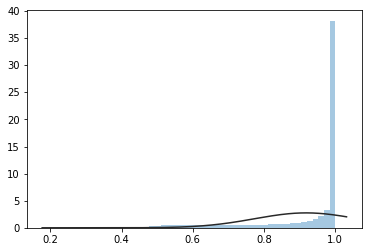

In [12]:
sns.distplot(soft_max, fit=norm, kde=False)

In [40]:
unsup_std_deviations = 0.5
upper_limit = mu + unsup_std_deviations*std 
lower_limit = mu
indices = ((soft_max <= upper_limit) & (soft_max >= lower_limit)).nonzero().view(-1).tolist()
print("Filtered indices from unlabeled softmax confidences with upper limit %0.4f, lower limit %0.4f,count %d" %(upper_limit, lower_limit, len(indices)))
print(indices[0:20])

Filtered indices from unlabeled softmax confidences with upper limit 0.9907, lower limit 0.9182,count 86797
[1, 8, 11, 15, 19, 28, 36, 37, 39, 40, 44, 45, 50, 55, 57, 67, 79, 94, 97, 105]


In [ ]:
print(soft_max[indices])